In [59]:
import tokenizer
import pickle
import pandas as pd
import numpy as np
import glob
import os
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
import json
import sparse_matrix_functions
import scipy.sparse as scs
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/ale/Dropbox (Yadlin Family)/galvanize/capstone/*.txt'

In [ ]:
with open("gene_dictionary_final.pickle", "rb") as dict_gene:
        gene_dict = pickle.load(dict_gene)

In [ ]:
gene_keys = set(gene_dict.keys())
gene_values = set(gene_dict.values())

In [ ]:
gene_dict['her2']

In [ ]:
with open("drug_dictionary_final.pickle", "rb") as dict_drug:
        drug_dict = pickle.load(dict_drug)

In [ ]:
drug_keys = set(drug_dict.keys())
drug_values = set(drug_dict.values())

In [ ]:
'#doxorubicin hydrochloride#' in drug_values

In [ ]:
drug_dict['acridine carboxamide']

In [ ]:
with open("greek_alphabet.pickle", "rb") as dict_greek:
        greek_dict = pickle.load(dict_greek)

In [3]:
import data_frame_creator
import sparse_matrix_functions

In [4]:
test=data_frame_creator.sparse_create_data_frame(path, short_list=True, min_df=0)

In [5]:
vocab_matrix =test[0]
vocab_matrix[vocab_matrix>1]=1
vocab_columns = test[1]
doc_names = test[2] 
orig_sentences =test[3]

In [6]:
col_idx=sparse_matrix_functions.column_indexing(vocab_columns)

In [63]:
test_matrix_all = sparse_matrix_functions.pick_network_type(vocab_matrix, vocab_columns,kind='a')

In [64]:
test_matrix_all

<2892x398 sparse matrix of type '<class 'numpy.float64'>'
	with 5640 stored elements in Compressed Sparse Row format>

In [8]:
test_matrix_r = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,'r')

In [9]:
test_matrix_s = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,kind='s')

In [10]:
vocab_matrix

<2892x399 sparse matrix of type '<class 'numpy.int64'>'
	with 2930 stored elements in Compressed Sparse Row format>

In [49]:
type(test_matrix_all)

scipy.sparse.coo.coo_matrix

In [12]:
test_matrix_r

<135x398 sparse matrix of type '<class 'numpy.int64'>'
	with 428 stored elements in Compressed Sparse Row format>

In [50]:
type(test_matrix_s)

scipy.sparse.csr.csr_matrix

In [58]:
scs.csr_matrix([1,1])

<1x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
non_empty_rows = sparse_matrix_functions.non_zero_rows(vocab_matrix)

In [ ]:
sentences = [orig_sentences[i] for i in non_empty_rows]

In [ ]:
files = [doc_names[i] for i in non_empty_rows]

In [ ]:
vocab_mat_clean=sparse_matrix_functions.remove_zero_rows(vocab_matrix)

In [ ]:
vocab_mat_clean

In [ ]:
vocab_matrix.shape

In [ ]:
print(list(vocab_matrix[:,vocab_columns.index('sensit')].indices))

In [ ]:
sensit2

In [14]:
network_genes=sparse_matrix_functions.get_network_rows(vocab_columns)

In [15]:
network_drugs =sparse_matrix_functions.get_network_columns(vocab_columns)

In [104]:
network_drugs

{0: '#afuresertib#',
 1: '#akt inhibitor gsk2141795#',
 2: '#akt inhibitor mk2206#',
 3: '#alisertib#',
 4: '#alpelisib#',
 5: '#anastrozole#',
 6: '#apatinib#',
 7: '#bevacizumab#',
 8: '#binimetinib#',
 9: '#broxuridine#',
 10: '#buparlisib#',
 11: '#capecitabine#',
 12: '#carbendazim#',
 13: '#carboplatin#',
 14: '#cetuximab#',
 15: '#cisplatin#',
 16: '#cixutumumab#',
 17: '#clofarabine#',
 18: '#cyclophosphamide#',
 19: '#dacarbazine#',
 20: '#dalotuzumab#',
 21: '#daunorubicin#',
 22: '#dexamethasone#',
 23: '#docetaxel#',
 24: '#doxorubicin#',
 25: '#epirubicin#',
 26: '#erlotinib#',
 27: '#everolimus#',
 28: '#exemestane#',
 29: '#fluorouracil#',
 30: '#folitixorin#',
 31: '#fulvestrant#',
 32: '#gemcitabine#',
 33: '#hydroxyurea#',
 34: '#infliximab#',
 35: '#iproplatin#',
 36: '#lenalidomide#',
 37: '#letrozole#',
 38: '#leucovorin calcium#',
 39: '#mek inhibitor ci-1040#',
 40: '#menogaril#',
 41: '#methotrexate#',
 42: '#mitoxantrone#',
 43: '#mtor kinase inhibitor cc-223#'

In [16]:
resist_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_r, vocab_columns)

In [17]:
pairs_r, counts_r = sparse_matrix_functions.extract_gene_drug_pairs(resist_network_matrix, network_genes, network_drugs)

In [18]:
original_indeces_r = sparse_matrix_functions.back_to_original_indeces(pairs_r, col_idx)

In [20]:
resist_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7, test, original_indeces_r)

In [21]:
resist_evidence_akt_lapatinib

[('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).')]

In [37]:
sensit_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_s, vocab_columns)

In [38]:
pairs_s, counts_s = sparse_matrix_functions.extract_gene_drug_pairs(sensit_network_matrix, network_genes, network_drugs)

In [44]:
original_indeces_s = sparse_matrix_functions.back_to_original_indeces(pairs_s, col_idx)

In [45]:
sensit_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7,test, original_indeces_s)

In [46]:
sensit_evidence_akt_lapatinib

'There is no evidence that the prensece of the gene akt confers resistance to the drug lapatinib'

In [83]:
all_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_all, vocab_columns)

In [84]:
pairs_a, counts_a = sparse_matrix_functions.extract_gene_drug_pairs(all_network_matrix, network_genes, network_drugs)

In [85]:
original_indeces_a = sparse_matrix_functions.back_to_original_indeces(pairs_a, col_idx)

In [86]:
all_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences('akt','lapatinib','a',7, 
                                                                               test, original_indeces_a)

Returning evidence of both sensitivity and resistant


In [89]:
all_evidence_akt_lapatinib

[('test.txt',
  'In BT474 and MCF10A breast cancer cells transfected with the construct encoding HER2-T798M mutation, elevated HER2 kinase activity was detected and lapatinib did not block phosphorylation of HER2, EGFR3 or downstream Akt and ERK1 2.'),
 ('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).'),
 ('test.txt',
  'I  Recurrent BC, -Stage IV BC, Active, not MK2206, paclitaxel Not Unspecified Adult recruiting Provided Solid Tumor Triciribine (an Akt inhibitor), Not paclitaxel, provided doxorubicin, cyclophosphamide Cisplatin, 0941, a inhibitor GDCNot PI3K provided  I  II  Metastatic Carcinoma Stage IV  BC, Currently Breast recruiting participants  I II  ER- BC, HER- BC, TNBC, Recurrent Currently BC, Stage IV BC recruiting participants  II  HER2

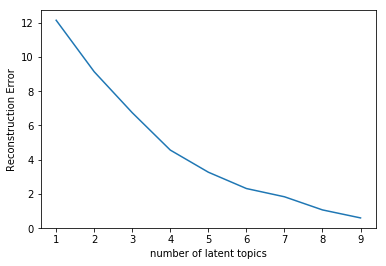

In [108]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(M,r):
    nmf = NMF(n_components=r)
    nmf.fit(M)
    W = nmf.transform(M)
    H = nmf.components_
    return nmf.reconstruction_err_

error = [fit_nmf(resist_network_matrix,i) for i in range(1,10)]
plt.plot(range(1,10), error)
plt.xticks(range(1, 10))
plt.xlabel('number of latent topics')
plt.ylabel('Reconstruction Error')

In [109]:
# Fit using 2 hidden concepts
nmf = NMF(n_components=1)
nmf.fit(resist_network_matrix)
W = nmf.transform(resist_network_matrix)
H = nmf.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

RSS = 12.14


In [110]:
# Make interpretable
W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W,index=network_genes)
H = pd.DataFrame(H,columns=network_drugs)

display(W) 
display(H)

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.48
9,0.00


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.0,0.0,0.0,0.0,0.0,0.0,1.39,0.21,0.0,0.0,...,0.21,0.41,0.21,0.21,0.0,0.0,3.92,0.28,0.17,0.0
